In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [160]:
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [161]:
#importing data
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

#filtering out cols relevant to exteriment
data = df[['happy', 'agea', 'partner']].dropna()

#sort data by age
data = data.sort_values(by=['agea'])

In [170]:
#add age_categories to data

data['age_category'] = None
data.loc[(data.agea >= 15)&(data.agea <=24 ), 'age_category'] = '15_24'
data.loc[(data.agea >= 25)&(data.agea <=34 ), 'age_category'] = '25_34'
data.loc[(data.agea >= 35)&(data.agea <=44 ), 'age_category'] = '35_44'
data.loc[(data.agea >= 45)&(data.agea <=54 ), 'age_category'] = '45_54'
data.loc[(data.agea >= 55)&(data.agea <=64 ), 'age_category'] = '55_64'
data.loc[(data.agea >= 65)&(data.agea <=74 ), 'age_category'] = '65_74'
data.loc[(data.agea >= 75)&(data.agea <=84 ), 'age_category'] = '75_84'
data.loc[(data.agea >84), 'age_category'] = '>84'

age_categories = ['15_24', '25_34', '35_44', '45_54', '55_64', '65_74', '75_84', '>84']

#re-categorize the partner col into married and single
data.loc[data['partner'] == 1, 'partner'] = 'married'
data.loc[data['partner'] == 2, 'partner'] = 'single'

In [171]:
#compute sample sizes for each age category

sample_sizes = data.age_category.value_counts()
print(sample_sizes)

45_54    1544
35_44    1456
55_64    1362
15_24    1159
25_34    1128
65_74    1042
75_84     486
>84       132
Name: age_category, dtype: int64


In [172]:
#Data overview
print("\n")
print('Data shape: {}'.format(data.shape), "\n")
print(data.head(), "\n")



Data shape: (8309, 4) 

      happy  agea partner age_category
8593    7.0  15.0  single        15_24
6772    8.0  15.0  single        15_24
7685   10.0  15.0  single        15_24
7684    9.0  15.0  single        15_24
7683    7.0  15.0  single        15_24 



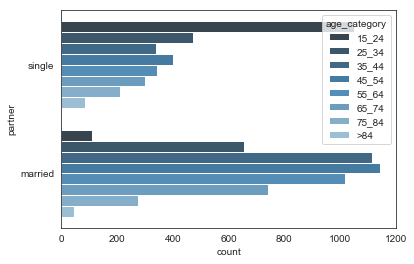

In [173]:
#visualization of data

sns.countplot(y="partner", hue="age_category", data=data, palette="Blues_d")
plt.show()

Text(0.5, 1.0, 'Comparing happiness level for single and married people based on age category')

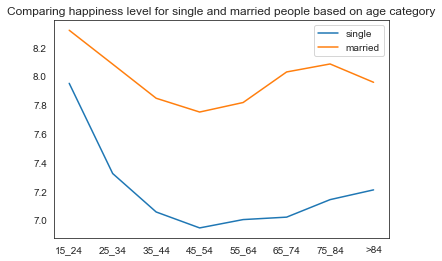

In [174]:
#let's see how happiness varies across ages in each gender group
#obtain data for male only, select only the 'age_category' and 'happy' column, group the resulting data by 'age_category', 
#finally obtain the mean for each group. Do the same for female 
data_single = data[data.partner=='single'][['age_category', 'happy']].groupby('age_category').mean()
data_married = data[data.partner=='married'][['age_category', 'happy']].groupby('age_category').mean()

#plotting the mean for male and female accross age categories
plt.plot(data_single)
plt.plot(data_married)
plt.legend(['single','married'])
plt.title('Comparing happiness level for single and married people based on age category')

In [175]:
#calculating t and p-values for the male and female categories

tvalues = [] 
pvalues = []
print('Test result for single and married across age categories', "\n")
for category in data.age_category.unique():
    print(category)
    categorized_data = data[data.age_category == category]
    tval, pval = stats.ttest_ind(categorized_data[categorized_data.partner == 'married'].happy,
                          categorized_data[categorized_data.partner == 'single'].happy)
    print(tval, pval, "\n")
    tvalues.append(tval)
    pvalues.append(pval)        

Test result for single and married across age categories 

15_24
2.4189743759314624 0.01571782843514271 

25_34
7.764359443462724 1.835588067546369e-14 

35_44
7.734463478893192 1.928283456248413e-14 

45_54
8.022645904569027 2.030172895938651e-15 

55_64
7.569690211504558 6.868756310591903e-14 

65_74
8.707254540979012 1.2045612792750301e-17 

75_84
5.177340583109178 3.3061011014268317e-07 

>84
1.929747306046516 0.0558165271718733 



In [176]:
# creating data for t-value plots
tvalues_plot = pd.DataFrame({'t': tvalues, 
                             'p': pvalues,
                             'sample_sizes': sample_sizes, 
                             'age_ranges': age_categories})

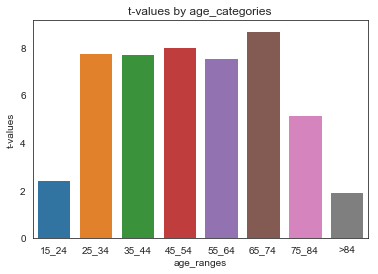

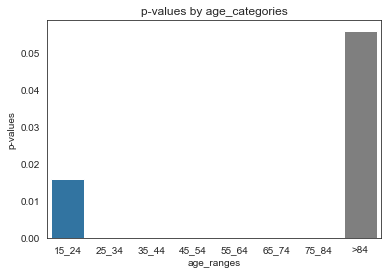

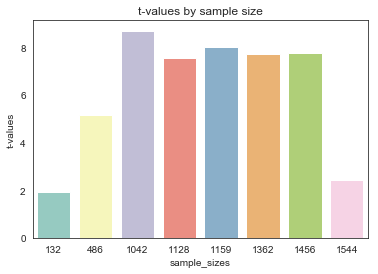

In [184]:
# t-values by age category

ax = sns.barplot(y='t',x='age_ranges',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by age_categories')
plt.show()

ax = sns.barplot(y='p',x='age_ranges',ci=None,data=tvalues_plot)
ax.set(ylabel='p-values',title='p-values by age_categories')
plt.show()

# t-values by sample sizes
ax = sns.barplot(y='t',x='sample_sizes',ci=None,data=tvalues_plot,palette='Set3')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()